In [3]:
%matplotlib inline

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import model_selection as cv
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_digits
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

from statsmodels.stats.proportion import proportion_confint
import sklearn.neighbors as nb

In [7]:
data = pd.read_csv('data_balanced_normalized.csv')
data.head()
X = data.drop('heart_attack',axis=1)
y = data['heart_attack']
# as a first approach, we will use the standard of 70/30 train/test split (in the future we might adjust it)
(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y, test_size = .3, random_state = 1)

0.793172216536776
[[15347  3742]
 [ 4140 14880]]

Accuracy: 0.793172216536776

              precision    recall  f1-score   support

           0       0.79      0.80      0.80     19089
           1       0.80      0.78      0.79     19020

    accuracy                           0.79     38109
   macro avg       0.79      0.79      0.79     38109
weighted avg       0.79      0.79      0.79     38109



<Figure size 640x480 with 0 Axes>

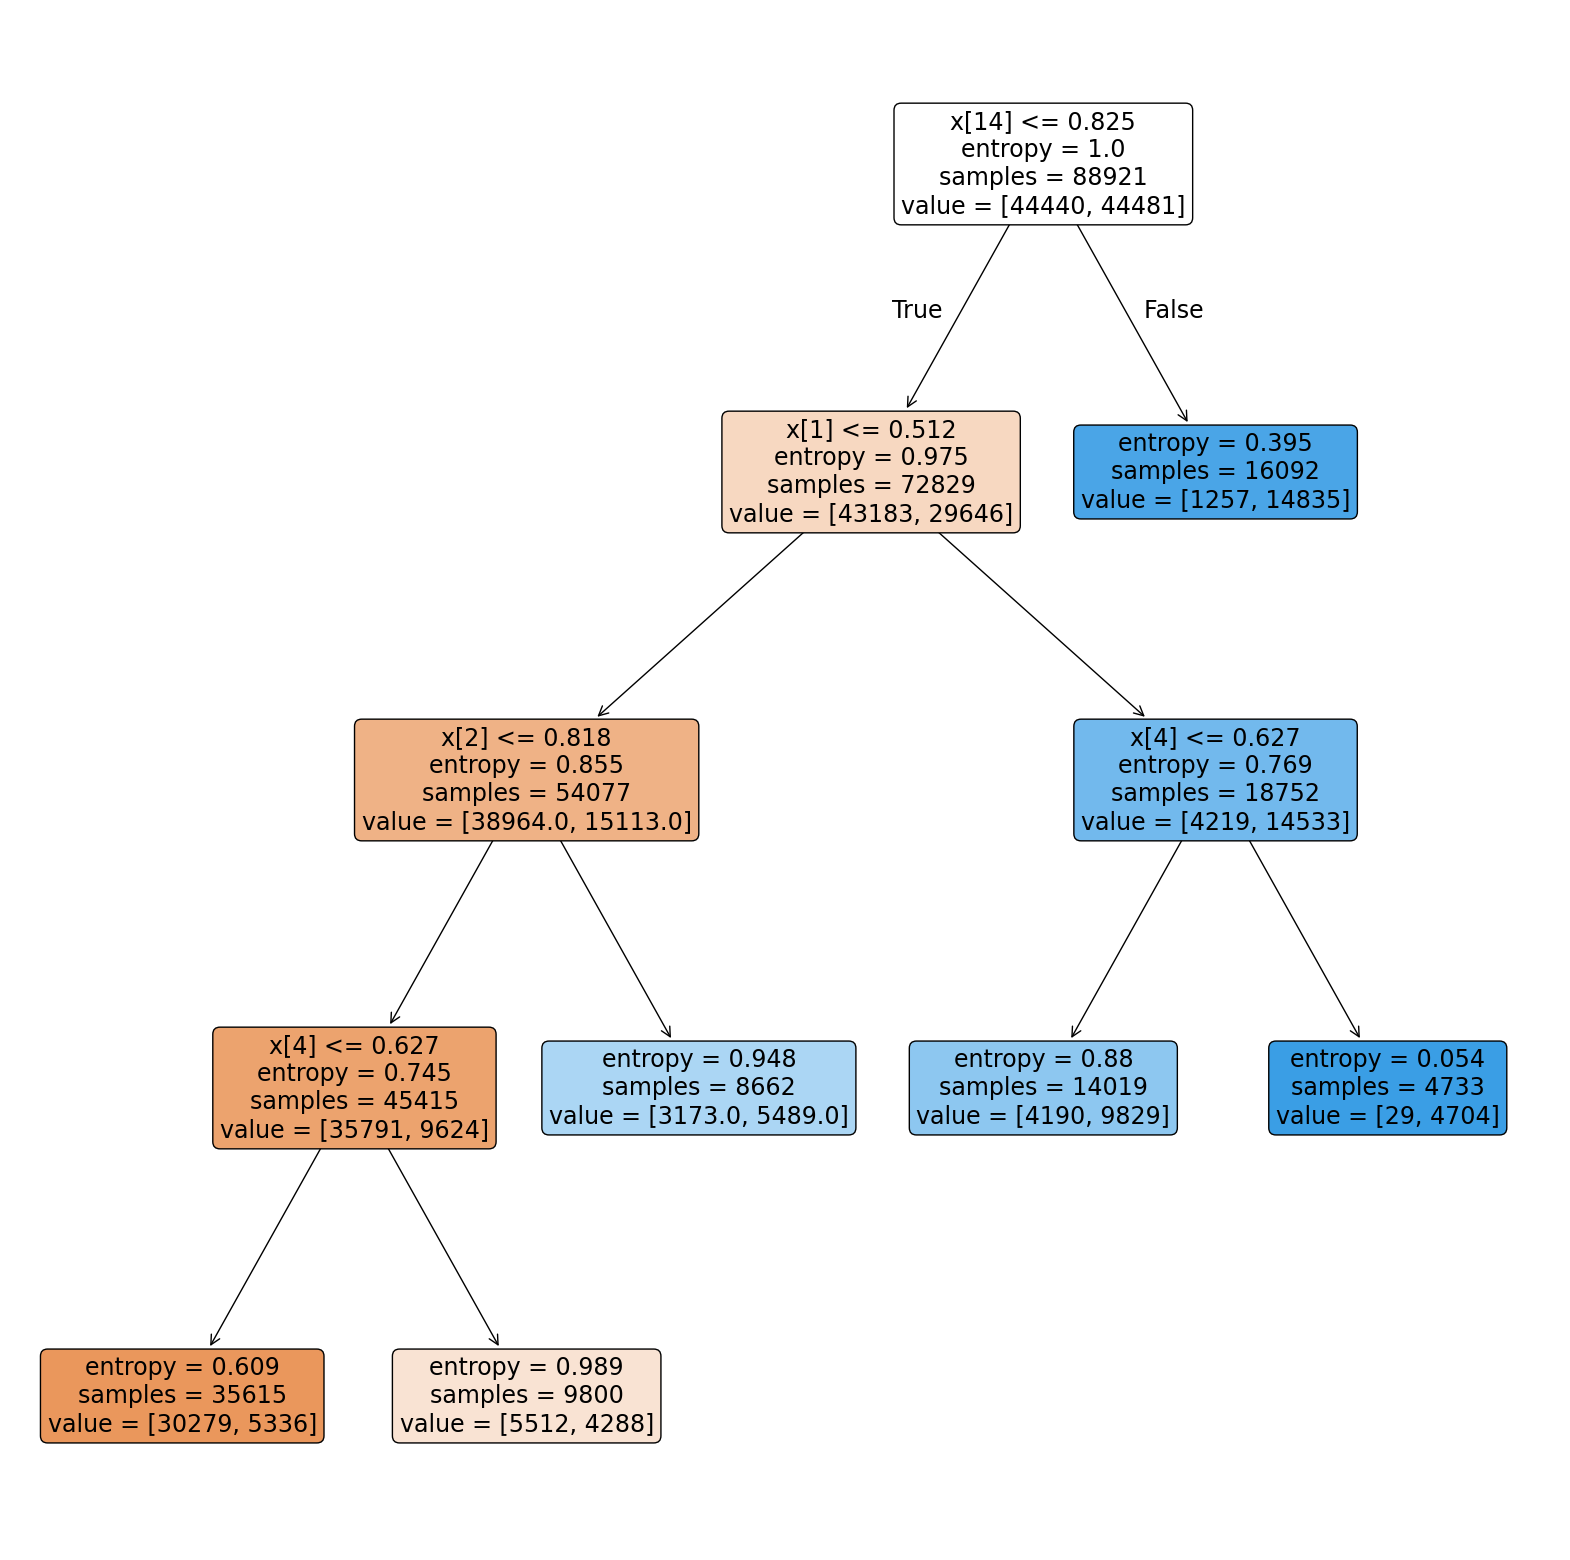

In [8]:
clf = DecisionTreeClassifier(
    criterion = "entropy",
    min_samples_split = 4,
    min_impurity_decrease = 0.02
)
clf = clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

print(clf.score(X_test, y_test))
print(confusion_matrix(y_test, prediction))
print(f"\nAccuracy: {accuracy_score(y_test, prediction)}\n")
print(classification_report(y_test, prediction))
epsilon = accuracy_score(y_test, prediction)

fig = plt.gcf()
#fig.set_size_inches(800, 80)
plt.figure(figsize=(20,20))
plot_tree(clf, filled=True, rounded=True)
#fig.savefig("tree.png")
plt.show()